In [1]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam
#
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)
print("import done")

Using TensorFlow backend.


import done


In [2]:
#https://github.com/debadridtt/A-Review-of-Different-Word-Embeddings-for-Sentiment-Classification-using-Deep-Learning/blob/master/LSTM%20Experiment.ipynb

### Loading the data

In [3]:
import os
DATA_FILE = os.path.abspath('DATA/data.csv')
df = pd.read_csv(DATA_FILE,delimiter=';',encoding='UTF-8')
print(df.head())

                                                text     label
0  I had ordered a data cable, got a very well fi...  NOTISSUE
1                                   Love This Phone.  NOTISSUE
2                I get a very well finished product.  NOTISSUE
3                            I could not be happier.  NOTISSUE
4  I was looking for this headset for a long time...  NOTISSUE


In [4]:
df['label'].value_counts() #balanced Dataset


ISSUE       2034
NOTISSUE    2022
Name: label, dtype: int64

In [5]:
df.shape

(4056, 2)

### Exploratory Data Analysis

C:\Users\khmar\ana\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\khmar\ana\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


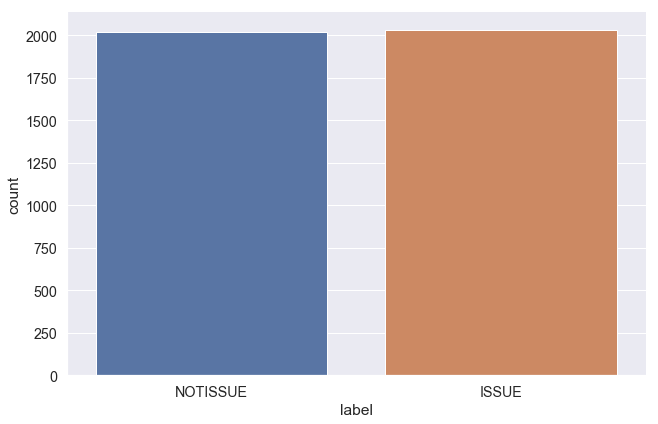

In [6]:
#Target variable
sns.factorplot(x="label", data=df, kind="count", size=6, aspect=1.5)
plt.show();

###  Preprocessing the Data


In [7]:
# List stop words
STOP_WORDS ={
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 #'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 #'became',
 'because',
 #'become',
 #'becomes',
 #'becoming',
 #'been',
 'before',
 'beforehand',
 #'behind',
 #'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 #'call',
 'can',
 'cannot',
 'could',
 'did',
 #'do',
 #'does',
 #'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 #'everything',
 'everywhere',
 'except',
 'few',
 'first',
 'for',
 'former',
 'formerly',
 'from',
 'front',
 'full',
 'further',
 #'had',
 #'has',
 #'have',
 'he',
 'hence',
 'her',
 'here',
 'hereafter',
 'hereby',
 'herein',
 'hereupon',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'however',
 'hundred',
 'i',
 'if',
 'in',
 'indeed',
 'into',
 'is',
 'it',
 'its',
 'itself',
 'just',
 'last',
 'latter',
 'latterly',
 'least',
 'less',
 #'made',
 #'make',
 'many',
 'may',
 'me',
 'meanwhile',
 'might',
 'mine',
 'more',
 'moreover',
 'most',
 'mostly',
 'move',
 'much',
 'must',
 'my',
 'myself',
 'name',
 'namely',
 'neither',
 'nevertheless',
 'next',
 'noone',
 'nor',
 'now',
 'nowhere',
 'of',
 'off',
 'often',
 'on',
 'once',
 'only',
 'onto',
 'or',
 'other',
 'others',
 'otherwise',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'part',
 'per',
 'perhaps',
 'put',
 'quite',
 'rather',
 're',
 'really',
 'regarding',
 'same',
 #'say',
 #'see',
 #'seem',
 #'seemed',
 #'seeming',
 #'seems',
 'serious',
 'several',
 'she',
 'should',
 #'show',
 'side',
 'since',
 'so',
 'some',
 'somehow',
 'someone',
 'something',
 'sometime',
 'sometimes',
 'somewhere',
 'still',
 'such',
 #'take',
 'than',
 'that',
 'the',
 'their',
 'them',
 'themselves',
 'then',
 'thence',
 'there',
 'thereafter',
 'thereby',
 'therefore',
 'therein',
 'thereupon',
 'these',
 'they',
 'third',
 'this',
 'those',
 'though',
 'three',
 'through',
 'throughout',
 'thru',
 'thus',
 'to',
 'together',
 'too',
 'top',
 #'toward',
 #'towards',
 'twelve',
 'under',
 'unless',
 'until',
 'up',
 'upon',
 'us',
 #'used',
 'using',
 'various',
 'very',
 'via',
 'was',
 'we',
 'were',
 'what',
 'whatever',
 'when',
 'whence',
 'whenever',
 'where',
 'whereafter',
 'whereas',
 'whereby',
 'wherein',
 'whereupon',
 'wherever',
 'whether',
 'which',
 'while',
 'whither',
 'who',
 'whoever',
 'whole',
 'whom',
 'whose',
 'why',
 'will',
 'with',
 'within',
 'without',
 'would',
 'yet',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves'}

In [8]:
switcher = {
"couldn't": "could not",
        "couldn": "could not",
        "won't": "will not",
        "won": "will not",
        "mustn't": "must not",
        "mustn": "must not",
        "that'll": "that will",
        "shouldn't": "should not",
        "shouldn": "should not",
        "should've": "should have",
        "haven't": "have not",
        "haven": "have not",
        "hadn't": "have not",
        "hadn": "have not",
        "hasn't": "have not",
        "hasn": "have not",
        "didn't": "do not",
        "didn": "do not",
        "doesn't": "do not",
        "doesn": "do not",
        "don't": "do not",
        "don": "do not", 
        "isn't": "be not",
        "you'd":"you would",
        "you've":"you have",
        "you're":"you are",
        "you'll":"you will",
        "she's":"she is",
        "she'd":"she would",
        "she'll":"she will",
        "he's":"he is",
        "he'd":"he would",
        "he'll":"he will",
        "it's":"it is",
        "it'd":"it would",
        "it'll":"it will",
        "aren't":"are not",
        "aren":"are not",
        "weren't":"were not",
        "weren":"were not",
        "wouldn't":"would not",
        "wouldn":"would not",
        "needn't":"need not",
        "needn":"need not",
        "wasn't":"was not",
        "wasn":"was not",
        "mightn't":"might not",
        "mightn":"might not",
        "shan't":"shall not",
        "shan":"shall not", 
        "can't":"can not",
        "i'm":"i am",
        "i'd":"i would",
        "i'll":"i will",
        "i've":"i have",
        "we're":"we are",
        "we'd":"we would",
        "we'll":"we will",
        "we've":"we have",
        "they're":"they are",
        "they'd":"they would",
        "they'll":"they will",
        "they've":"they have",
        "let's":"let us",
        "how's":"how is",
        "here's":"here is",
        "what's":"what is",
        "there's":"there is",
        'awsm': 'awesome',
        "aamof": "as a matter of fact",
        "abt": "about",
        "abt2": "about to",
        "ac": "air conditioning",
        "ace": "solo winner",
        "ack": "acknowledged",
        "admin": "administrator",
        "thr": "there",
        "frm": "from",
        "aggro": "aggression",
        "agl": "angel",
        "dob": "date of birth",
        "ai": "artificial intelligence",
        "aiic": "as if i care",
        "aka": "also known as",
        "alap": "as long as possible",
        "alol": "actually laughing out loud",
        "ama": "ask me anything",
        "amap": "as much as possible",
        "amazn": "amazing",
        "ammo": "ammunition",
        "ams": "ask me something",
        "anon": "anonymous",
        "asap": "as soon as possible",
        "asat": "as simple as that",
        "awks": "awkward",
        "awl": "always with love",
        "ayk": "as you know",
        "azm": "awesome",
        "b": "be",
        "b&w": "black and white",
        "b-day": "birthday",
        "bday": "birthday",
        "bcoz": "because",
        "bcos": "because",
        "bcz": "because",
        "bf": "boyfriend",
        "btw": "between",
        "b4": "before",
        "bai": "bye",
        "bb": "bye bye",
        "bc": "abuse",
        "mc": "abuse",
        "bcc": "blind carbon copy",
        "bff": "best friends forever",
        "biz": "business",
        "bk": "back",
        "bo": "back off",
        "bro": "brother",
        "btwn": "between",
        "c": "see",
        "char": "character",
        "combo": "combination",
        "cu": "see you",
        "cu2": "see you too",
        "cu2mr": "see you tomorrow",
        "cya": "see ya",
        "cyal8r": "see you later",
        "cyb": "call you back",
        "cye": "check your e-mail",
        "cyf": "check your facebook",
        "cyfb": "check your facebook",
        "cyl": "catch ya later",
        "cym": "check your myspace",
        "cyo": "see you online",
        "d8": "date",
        "da": "the",
        "dece": "decent",
        "ded": "dead",
        "dept": "department",
        "dis": "this",
        "ditto": "same",
        "diva": "rude woman",
        "dk": "don't know",
        "dlm": "don't leave me",
        "dm": "direct message",
        "dnd": "do not disturb",
        "dno": "don't know",
        "dnt": "don't",
        "e1": "everyone",
        "eg": "for example",
        "emc2": "genius",
        "emo": "emotional",
        "enuf": "enough",
        "eod": "end of discussion",
        "eof": "end of file",
        "eom": "end of message",
        "eta": "estimated time of arrival",
        "every1": "everyone",
        "evs": "whatever",
        "exp": "experience",
        "f": "female",
        "f2f": "face to face",
        "f2p": "free to play",
        "f2t": "free to talk",
        "f9": "fine",
        "fab": "fabulous",
        "fail": "failure",
        "faq": "frequently asked questions",
        "fav": "favorite",
        "fave": "favorite",
        "favs": "favorites",
        "fb": "facebook",
        "fbc": "facebook chat",
        "fbf": "facebook friend",
        "fml": "family",
        "fn": "fine",
        "fo": "freaking out",
        "fri": "friday",
        "frnd": "friend",
        "fu": "fuck you",
        "fugly": "fucking ugly",
        "gf": "girlfriend",
        "g1": "good one",
        "g2b": "going to bed",
        "g2cu": "good to see you",
        "g2g": "good to go",
        "g4i": "go for it",
        "g4n": "good for nothing",
        "g4u": "good for you",
        "g9": "goodnight",
        "ga": "go ahead",
        "ge": "good evening",
        "gl": "good luck",
        "gm": "good morning",
        "gn": "goodnight",
        "gonna": "going to",
        "goon": "idiot",
        "gorge": "gorgeous",
        "gr8": "great",
        "grats": "congratulations",
        "gratz": "congratulations",
        "grl": "girl",
        "gt2t": "got time to talk",
        "gtg": "good to go",
        "gud": "good",
        "gv": "give",
        "gvn": "given",
        "gw": "good work",
        "h/o": "hold on",
        "h/p": "hold please",
        "h/t": "hat tip",
        "h/u": "hook up",
        "h2cus": "hope to see you soon",
        "h4u": "hot for you",
        "h4x0r": "hacker",
        "h4x0rz": "hackers",
        "h8": "hate",
        "h8r": "hater",
        "h8t": "hate",
        "ha": "hello again",
        "haha": "laughing",
        "hai": "hi",
        "hak": "hugs and kisses",
        "han": "how about now?",
        "hav": "have",
        "hax": "hacks",
        "haxor": "hacker",
        "hay": "how are you",
        "hb2u": "happy birthday to you",
        "hbbd": "happy belated birthday",
        "hbd": "happy birthday",
        "hc": "how cool",
        "hcit": "how cool is that",
        "hehe": "laughing",
        "hf": "have fun",
        "hi5": "high five",
        "hig": "how's it going?",
        "hih": "hope it helps",
        "ho": "hold on",
        "hoc": "house of cards",
        "hof": "hall of fame",
        "holla": "holler",
        "hom": "hit or miss",
        "hood": "neighborhood",
        "hoops": "basketball",
        "hottie": "attractive person",
        "hr": "human resources",
        "hru": "how are you",
        "hry": "hurry",
        "hubby": "husband",
        "hwk": "homework",
        "hwp": "height weight proportionate",
        "hwu": "hey, what's up?",
        "hxc": "hardcore",
        "h^": "hook up",
        "i8": "i ate",
        "i8u": "i hate you",
        "ia": "i agree",
        "iab": "in a bit",
        "iac": "in any case",
        "iad": "it all depends",
        "iae": "in any event",
        "iag": "it's all good",
        "iagw": "in a good way",
        "iail": "i am in love",
        "iam": "in a minute",
        "ic": "i see",
        "id10t": "idiot",
        "idc": "i don't care",
        "idd": "indeed",
        "idi": "i doubt it",
        "idk": "i don't know",
        "idky": "i don't know why",
        "idmb": "i'll do my best",
        "idn": "i don't know",
        "idnk": "i do not know",
        "idr": "i don't remember",
        "idt": "i don't think",
        "idts": "i don't think so",
        "idtt": "i'll drink to that",
        "idu": "i don't understand",
        "ie": "that is",
        "ig2p": "i got to pee",
        "iggy": "ignored",
        "ight": "alright",
        "igi": "i get it",
        "ign": "in-game name",
        "igtp": "i get the point",
        "ih8u": "i hate you",
        "ihu": "i hate you",
        "ihy": "i hate you",
        "ii": "i'm impressed",
        "iiok": "if i only knew",
        "iir": "if i remember",
        "iirc": "if i remember correctly",
        "iit": "i'm impressed too",
        "iiuc": "if i understand correctly",
        "ik": "i know",
        "ikhyf": "i know how you feel",
        "ikr": "i know, right?",
        "ikwum": "i know what you mean",
        "ikwym": "i know what you mean",
        "ikyd": "i know you did",
        "ilu": "i like you",
        "ilu2": "i love you too",
        "ilub": "i love you baby",
        "ilyk": "i'll let you know",
        "ilyl": "i love you lots",
        "ilysm": "i love you so much",
        "ima": "i'm",
        "imma": "i'm gonna",
        "imo": "in my opinion",
        "imy": "i miss you",
        "inb4": "in before",
        "inc": "incoming",
        "indie": "independent",
        "info": "information",
        "init": "initialize",
        "ipo": "initial public offering",
        "ir": "in room",
        "ir8": "irate",
        "irdk": "i really don't know",
        "irl": "in real life",
        "iyo": "in your opinion",
        "iyq": "i like you",
        "j/k": "just kidding",
        "j/p": "just playing",
        "j/w": "just wondering",
        "j2lyk": "just to let you know",
        "j4f": "just for fun",
        "j4g": "just for grins",
        "jas": "just a second",
        "jb/c": "just because",
        "joshing": "joking",
        "k": "ok",
        "k3u": "i love you",
        "kappa": "sarcasm",
        "kek": "korean laugh",
        "keke": "korean laugh",
        "kewl": "cool",
        "kewt": "cute",
        "kfc": "kentucky fried chicken",
        "kgo": "ok, go",
        "kik": "laughing out loud",
        "kinda": "kind of",
        "kk": "ok",
        "kl": "kool",
        "km": "kiss me",
        "kma": "kiss my ass",
        "knp": "ok, no problem",
        "kw": "know",
        "kwl": "cool",
        "l2m": "listening to music",
        "l2p": "learn to play",
        "l33t": "leet",
        "l8": "late",
        "l8er": "later",
        "l8r": "later",
        "la": "laughing a lot",
        "laf": "laugh",
        "laffing": "laughing",
        "lafs": "love at first sight",
        "lam": "leave a message",
        "lamer": "lame person",
        "legit": "legitimate",
        "lemeno": "let me know",
        "lil": "little",
        "lk": "like",
        "llol": "literally laughing out loud",
        "lmho": "laughing my head off",
        "loi": "laughing on the inside",
        "lola": "love often, laugh a lot",
        "lolol": "lots of laugh out louds",
        "lolz": "laugh out louds",
        "ltr": "later",
        "lulz": "lol",
        "luv": "love",
        "luzr": "loser",
        "lv": "love",
        "ly": "love ya",
        "lya": "love you always",
        "lyk": "let you know",
        "lyn": "lying",
        "lysm": "love you so much",
        "m": "male",
        "mcd": "mcdonald's",
        "mcds": "mcdonald's",
        "md@u": "mad at you",
        "me2": "me too",
        "meh": "whatever",
        "mf": "mother fucker",
        "mfb": "mother fucking bitch",
        "mgmt": "management",
        "mid": "middle",
        "mil": "mother-in-law",
        "min": "minute",
        "mins": "minutes",
        "mk": "okay",
        "mkay": "ok",
        "mmk": "ok",
        "mms": "multimedia messaging service",
        "mng": "manage",
        "mngr": "manager",
        "mod": "modification",
        "mofo": "mother fucking",
        "mojo": "attractive talent",
        "moss": "chill",
        "ms": "miss",
        "msg": "message",
        "mtg": "meeting",
        "mth": "month",
        "mu": "miss you",
        "mu@": "meet you at",
        "muah": "kiss",
        "mula": "money",
        "mwa": "kiss",
        "mwah": "kiss",
        "n/m": "nevermind",
        "n/m/h": "nothing much here",
        "n/r": "no reserve",
        "n00b": "newbie",
        "n1": "nice one",
        "n1c": "no one cares",
        "n2m": "not too much",
        "n2mh": "not too much here",
        "n2w": "not to worry",
        "n64": "nintendo 64",
        "n8kd": "naked",
        "nac": "not a chance",
        "nah": "no",
        "nal": "nationality",
        "narc": "tattle tale",
        "nark": "informant",
        "naw": "no",
        "nb": "not bad",
        "nbd": "no big deal",
        "nbjf": "no brag, just fact",
        "nd": "and",
        "ne": "any",
        "ne1": "anyone",
        "ne1er": "anyone here",
        "neh": "no",
        "nemore": "anymore",
        "neva": "never",
        "neway": "anyway",
        "newaze": "anyways",
        "newb": "newbie",
        "nite": "night",
        "nn2r": "no need to reply",
        "nnito": "not necessarily in that order",
        "nnto": "no need to open",
        "nntr": "no need to reply",
        "no1": "no one",
        "noob": "newbie",
        "nooblet": "young newbie",
        "nooblord": "ultimate newbie",
        "notch": "minecraft creator",
        "nottie": "unattractive person",
        "np": "no problem",
        "nub": "newbie",
        "nuff": "enough",
        "nufn": "nothing",
        "num": "tasty",
        "nvm": "nevermind",
        "nvr": "never",
        "nvrm": "nevermind",
        "nw": "no way",
        "nxt": "next",
        "o4u": "only for you",
        "obtw": "oh, by the way",
        "obv": "obviously",
        "obvi": "obviously",
        "oc": "of course",
        "ohemgee": "oh my gosh",
        "oic": "oh, i see",
        "oicn": "oh, i see now",
        "oiy": "hi",
        "omg": "oh my god",
        "onl": "online",
        "onoz": "oh no",
        "orly": "oh really",
        "otay": "okay",
        "otw": "on the way",
        "outta": "out of",
        "ovie": "overlord",
        "ownage": "completely owned",
        "p/d": "per day",
        "p/m": "per month",
        "p/y": "per year",
        "p911": "parent alert!",
        "p@h": "parents at home",
        "pc": "personal computer",
        "pda": "public display of affection",
        "pic": "picture",
        "pj": "poor joke",
        "pl8": "plate",
        "pld": "played",
        "pls": "please",
        "plz": "please",
        "plzrd": "please read",
        "pov": "point of view",
        "ppl": "people",
        "ppp": "peace",
        "prof": "professor",
        "prolly": "probably",
        "promo": "promotion",
        "props": "recognition",
        "prot": "protection",
        "prvt": "private",
        "ps": "postscript",
        "ps2": "playstation 2",
        "ps3": "playstation 3",
        "psa": "public service announcement",
        "psog": "pure stroke of genius",
        "psp": "playstation portable",
        "ptm": "please tell me",
        "pwd": "password",
        "psd": "password",
        "pswd": "password",
        "pwnd": "owned",
        "pwned": "owned",
        "pwnt": "owned",
        "q4u": "question for you",
        "qfe": "quoted for emphasis",
        "qft": "quoted for truth",
        "qq": "quick question",
        "qqn": "looking",
        "qrg": "quick reference guide",
        "qt": "cutie",
        "qtpi": "cutie pie",
        "r": "are",
        "r8": "rate",
        "rdy": "ready",
        "re": "replay",
        "rehi": "hi again",
        "rents": "parents",
        "rep": "reputation",
        "resq": "rescue",
        "rgd": "regard",
        "rgds": "regards",
        "ridic": "ridiculous",
        "rip": "rest in peace",
        "rl": "real life",
        "rlrt": "real life retweet",
        "rly": "really",
        "rm": "room",
        "rn": "run",
        "rnt": "aren't",
        "rof": "laughing",
        "rofl": "laughing",
        "roflmao": "laughing",
        "roflol": "laughing out loud",
        "rolf": "laughing",
        "ru": "are you",
        "ruc": "are you coming?",
        "rut": "are you there?",
        "rx": "prescription",
        "s/o": "sold out",
        "s/u": "shut up",
        "s/w": "software",
        "s2r": "send to receive",
        "s2s": "sorry to say",
        "s2u": "same to you",
        "samzd": "still amazed",
        "sd": "sweet dreams",
        "sec": "second",
        "sho": "sure",
        "sh^": "shut up",
        "siul8r": "see you later",
        "siv": "bad goaltender",
        "sk8": "skate",
        "sk8r": "skater",
        "sly": "still love you",
        "smf": "so much fun",
        "smooch": "kiss",
        "sorta": "sort of",
        "spec": "specialization",
        "spk": "speak",
        "spkr": "speaker",
        "srry": "sorry",
        "srs": "serious",
        "srsly": "seriously",
        "sry": "sorry",
        "stpd": "stupid",
        "str": "strength",
        "str8": "straight",
        "sup": "what's up",
        "syl": "see you later",
        "sync": "synchronize",
        "t2go": "time to go",
        "t2m": "talk to me",
        "t2u": "talk to you",
        "t2ul": "talk to you later",
        "t2ul8er": "talk to you later",
        "t2ul8r": "talk to you later",
        "t4lmk": "thanks for letting me know",
        "t4p": "thanks for posting",
        "t4t": "thanks for trade",
        "tc": "take care",
        "teh": "the",
        "teme": "tell me",
        "tg": "thank goodness",
        "thnq": "thank you",
        "tho": "though",
        "thru": "through",
        "tht": "that",
        "thx": "thanks",
        "tl": "tell",
        "tlk": "talk",
        "tlkin": "talking",
        "tlking": "talking",
        "tomoz": "tomorrow",
        "tq": "thank you",
        "tqvm": "thank you very much",
        "tru": "true",
        "ttl": "talk to you later",
        "ttly": "totally",
        "ttul": "talk to you later",
        "tty": "talk to you",
        "tu": "thank you",
        "tude": "attitude",
        "tx": "thanks",
        "txt": "text",
        "txtin": "texting",
        "ty": "thank you",
        "tyfa": "thank you for asking",
        "tyl": "thank you lord",
        "tym": "thank you much",
        "tyt": "take your time",
        "tyvm": "thank you very much",
        "u": "you",
        "u-ok": "you ok?",
        "u/l": "upload",
        "u2": "you too",
        "u2u": "up to you",
        "uok": "you ok?",
        "ur": "your",
        "ut": "you there?",
        "veggies": "vegetables",
        "vry": "very",
        "vs": "versus",
        "w/": "with",
        "w/b": "welcome back",
        "w/e": "whatever",
        "w/o": "without",
        "w2f": "way too funny",
        "w2g": "way to go",
        "w2k": "windows 2000",
        "w4u": "wait for you",
        "w8": "wait",
        "w84m": "wait for me",
        "w8am": "wait a minute",
        "w8ing": "waiting",
        "w8n": "waiting",
        "wa": "what",
        "waa": "crying",
        "wack": "strange",
        "wan2": "want to",
        "wannabe": "want to be",
        "wat": "what",
        "watev": "whatever",
        "watevs": "whatever",
        "wlcm": "welcome",
        "wha": "what",
        "whipped": "tired",
        "wht": "what",
        "wk": "week",
        "wknd": "weekend",
        "wtf": "what the fuck",
        "wtg": "way to go",
        "wup": "what's up?",
        "ya": "yes",
        "yeap": "yes",
        "yep": "yes",
        "yepperz": "yes",
        "yesh": "yes",
        "yo": "hi",
        "yr": "your",
        "yrs": "years",
        "yt": "you there?",
        "yt?": "you there?",
        "yup": "yes",
        "yupz": "ok",
        "zzz": "sleeping",
        "ain't": "is not", "aren't": "are not","can't": "cannot", 
        "can't've": "cannot have", "'cause": "because", "could've": "could have", 
        "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
        "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
        "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
        "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
        "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
        "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
        "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
        "I'll've": "I will have","I'm": "I am", "I've": "I have", 
        "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
        "i'll've": "i will have","i'm": "i am", "i've": "i have", 
        "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
        "it'll": "it will", "it'll've": "it will have","it's": "it is", 
        "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
        "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
        "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
        "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                    "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have"
}


In [9]:
import nltk
import inflect
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import parsing
from gensim.parsing.preprocessing import split_alphanum
from spellchecker import SpellChecker
import re

C:\Users\khmar\ana\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [10]:
def replace_word(word):
    # Convert text to lower
    word = word.lower()
    word = word.split()
    for i in range(len(word)):
        word[i] = switcher.get(word[i], word[i])
    word = " ".join(word)
    return word

def transformText(text):
    text = split_alphanum(text)
    # Convert text to lower
    text = text.lower()
    text = replace_word(text)
    #stops = set(stopwords.words("english"))

    # Removing non ASCII chars    
    text = re.sub(r'[^\x00-\x7f]',r' ',text)
    
    # Removing all the tokens with lesser than 3 characters
    #text = gensim.corpora.textcorpus.remove_short(text, minsize=3)
    
    # Strip all the numerics
    #text = gensim.parsing.preprocessing.strip_numeric(text)
    
    # Removing all the stopwords
    filtered_words = [word for word in text.split() if word not in STOP_WORDS]
    
    # Preprocessed text after stop words removal
    text = " ".join(filtered_words)
    
    # Remove the punctuation
    text = gensim.parsing.preprocessing.strip_punctuation2(text)
    
    # remove html markup
    text = re.sub("(<.*?>)","",text)
    
    
    # Correct words
    spell = SpellChecker()
    misspelled = text.split()
    wordnet_lemmatizer = WordNetLemmatizer()
    for i in range(len(misspelled)):
        # Get the one `most likely` answer
        word = spell.correction(misspelled[i])
        misspelled[i]=word
        
        ##### Lemmatization
        # Reduce words to their root form
        # Lemmatize verbs by specifying pos
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="v")
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="n")
    text = " ".join(misspelled)
    
    # Strip multiple whitespaces
    text = gensim.corpora.textcorpus.strip_multiple_whitespaces(text)
    return text

In [11]:
def replace_word(word):
    word = word.lower()
    word = word.split()
    for i in range(len(word)):
        word[i] = switcher.get(word[i], word[i])
    word = " ".join(word)
    return word

##Fixing Word Lengthening
##https://rustyonrampa"ge.github.io/text-mining/2017/11/28/spelling-correction-with-python-and-nltk.html
def reduce_lengthening(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

def replace_numbers(word):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    word = word.split()
    for i in range(len(word)):
        if word[i].isdigit():
            word[i] = p.number_to_words(word[i])
    word = " ".join(word)
    return word
def transformText(text):
    text = split_alphanum(text)
    # Convert text to lower
    text = text.lower()
    text = replace_word(text)
    text = replace_numbers(text)
    text = reduce_lengthening(text)
    # Removing non ASCII chars    
    text = re.sub(r'[^\x00-\x7f]',r' ',text)
    # Removing all the stopwords
    filtered_words = [word for word in text.split() if word not in STOP_WORDS]
    # Preprocessed text after stop words removal
    text = " ".join(filtered_words)
    # Remove the punctuation
    text = gensim.parsing.preprocessing.strip_punctuation2(text)
    # remove html markup
    text = re.sub("(<.*?>)","",text)
    # Correct words
    spell = SpellChecker()
    misspelled = text.split()
    wordnet_lemmatizer = WordNetLemmatizer()
    for i in range(len(misspelled)):
        # Get the one `most likely` answer
        word = spell.correction(misspelled[i])
        misspelled[i]=word
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="v")
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="n")
    text = " ".join(misspelled)
    
    # Strip multiple whitespaces
    text = gensim.corpora.textcorpus.strip_multiple_whitespaces(text)
    # Strip all the numerics
    #text = gensim.parsing.preprocessing.strip_numeric(text)
    return text

In [12]:
transformText(" she'd've I have so 20 soooooo don't i'm  can't servic going grooooooooop")

'have have twenty soo do not be service go group'

In [13]:
"""df['text'] = df['text'].map(transformText)
texts= df['text']
tags= df['label']"""

"df['text'] = df['text'].map(transformText)\ntexts= df['text']\ntags= df['label']"

In [ ]:
#df['text'] = df['text'].map(lambda x: transformText(x))

In [13]:
#df=df[texts,tags]

In [14]:
"""# dictionary of lists  
dict = {'text': texts , 'label': tags } 
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('Data/DATA_preprocessing6.csv')"""

"# dictionary of lists  \ndict = {'text': texts , 'label': tags } \n     \ndf = pd.DataFrame(dict) \n  \n# saving the dataframe \ndf.to_csv('Data/DATA_preprocessing6.csv')"

In [52]:
####

In [114]:
DATA_FILE = 'Data/DATA_preprocessing_brute.csv'
df = pd.read_csv(DATA_FILE,delimiter=',',encoding='UTF-8')

In [115]:
msk = np.random.rand(len(df)) < 0.7 # Splitting into train(70%) and test(30%) randomly

In [116]:
train_df=df[msk]
test_df=df[~msk]

In [117]:
print(train_df.shape)
print(test_df.shape)

(2845, 3)
(1210, 3)


In [118]:
print('Checking target values for train data:\n')
print(train_df['label'].value_counts(),'\n')
print('Checking target values for test data:\n')
print(test_df['label'].value_counts())

Checking target values for train data:

ISSUE       1425
NOTISSUE    1420
Name: label, dtype: int64 

Checking target values for test data:

NOTISSUE    608
ISSUE       602
Name: label, dtype: int64


In [119]:
train_df['label'].value_counts()


ISSUE       1425
NOTISSUE    1420
Name: label, dtype: int64

In [120]:
x_train=train_df['text']
y_train=train_df['label']
x_test=test_df['text']
y_test=test_df['label']

### GLOVE EMBEDDING 300

In [121]:
MAX_NB_WORDS = 20000
MAX_SEQUENCE_LENGTH = 200
maxlen = 120  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

In [122]:
texts_train = x_train.astype(str)
texts_test = x_test.astype(str)

In [123]:
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

C:\Users\khmar\ana\lib\site-packages\keras_preprocessing\text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [124]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, 
                     padding="pre", truncating="post")
test_data = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH, padding="pre",
                          truncating="post")

In [125]:
print('Shape of data tensor:', data.shape)
print('Shape of test_data tensor:', test_data.shape)

Shape of data tensor: (2845, 200)
Shape of test_data tensor: (1210, 200)


In [126]:
import pickle
file_tok = 'LSTM_token_glove_300d_DATA_wit_text_processing_brut.sav'
pickle.dump(tokenizer, open(file_tok, 'wb'))

In [127]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 3132 unique tokens.


In [128]:
#pad sequences are used to bring all sentences to same size.
# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (2845, 200)
Shape of data test tensor: (1210, 200)


In [129]:
y_train = y_train.map({"NOTISSUE": 1, "ISSUE" : 0 })
y_test = y_test.map({"NOTISSUE": 1, "ISSUE" : 0 })

In [130]:
# load the whole embedding into memory
embeddings_index = {}
f = open('C:/Users/khmar/Desktop/GLOVE/glove.6B.300d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [131]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))
#Found 1489 unique tokens : word_index
#print(len(word_index) + 1) #### 1490 
#print(word_index.items()) ### unique tokens : words :word_index
#print('embedding_matrix',embedding_matrix)
out_of_vocab={}
for word, i in word_index.items():
    #print(i)
    embedding_vector = embeddings_index.get(word)
    #print('embedding_vector' ,embedding_vector )
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        #print('word: ', word)
        embedding_matrix[i] = embedding_vector
        #print('embedding_matrix :',embedding_matrix[i] )
        # words not found in embedding index will be all-zeros.
    if embedding_vector is  None:
        print('word not found :',word)
        out_of_vocab[i] = word
            

word not found : flavourful
word not found : appal
word not found : 8810
word not found : shawarrma
word not found : profiterole
word not found : ciob
word not found : flavourless
word not found : accessoryone
word not found : 969900
word not found : tk50
word not found : barset
word not found : plantronincs
word not found : flipphones
word not found : a325
word not found : tracfonewebsite
word not found : supertooth
word not found : reoccure
word not found : 8125
word not found : s740
word not found : emailinc
word not found : convertor
word not found : convolute
word not found : stylize
word not found : mesmerise
word not found : brainsucking
word not found : tigerlilly
word not found : riingtones
word not found : untasted
word not found : smashburger
word not found : douchebaggery
word not found : albondigas
word not found : cosiness
word not found : cheesecurds


In [132]:
f'There are {len(out_of_vocab)} out of vocab '

'There are 33 out of vocab '

In [133]:

model_glove= Sequential()
model_glove.add(Embedding(len(word_index) + 1,
                            300,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False))
model_glove.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,input_shape=(1,)))
model_glove.add(Dense(1, activation='sigmoid'))

In [134]:
model_glove.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [135]:
model_glove.fit(data, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(test_data, y_test))

Train on 2845 samples, validate on 1210 samples
Epoch 1/2
2845/2845 [==============================] - 70s 24ms/step - loss: 0.5299 - acc: 0.7536 - val_loss: 0.4524 - val_acc: 0.8025
Epoch 2/2
2845/2845 [==============================] - 26s 9ms/step - loss: 0.4093 - acc: 0.8288 - val_loss: 0.4107 - val_acc: 0.8248


In [37]:
scores = model_glove.evaluate(x_test, y_test,
                            batch_size=batch_size)
print("%s: %.2f%%" % (model_glove.metrics_names[0], scores[0] * 100))
print("%s: %.2f%%" % (model_glove.metrics_names[1], scores[1] * 100))

1262/1262 [==============================] - 3s 2ms/step
loss: 39.51%
acc: 83.68%


In [38]:
# Save the model
model_glove.save('Model/LSTM_model_glove_300_DATA_with_text_processing_brut.sav')

### Prediction

In [39]:
##one text prediction!

In [137]:
def prediction(input_file,output_file):
    df= pd.DataFrame(columns=['label', 'text'])
    data = pd.read_csv(input_file,delimiter=',')
    inputt=data.text
    x_input = inputt.values
    ind=0
    for i in x_input:
        ind=ind+1
        text=np.array([i])
        seq= tokenizer.texts_to_sequences(text)
        sequences_matrix = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
        proba = model_glove.predict(sequences_matrix)
        class_pred = model_glove.predict_classes(sequences_matrix)
        classe=prediction_classe(class_pred)
        print(ind,i,proba,classe)
        df=df.append({'label':classe, 'text':i},ignore_index=True)
    df.to_csv(output_file,sep=';')
    return data,df

def prediction_classe(class_pred):
    if class_pred==0 :
        classe='ISSUE' 
    if class_pred==1 :
        classe='NOTISSUE'

    return classe

In [138]:
text="great product"
text=transformText(text)
text=np.array([text])
sequences= tokenizer.texts_to_sequences(text)
sequences_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
proba = model_glove.predict(sequences_matrix)
print(proba)
class_pred = model_glove.predict_classes(sequences_matrix)
print(prediction_classe(class_pred))

[[0.94603163]]
NOTISSUE


In [139]:
text="I have a problem can you help me"
text=transformText(text)
text=np.array([text])
sequences= tokenizer.texts_to_sequences(text)
sequences_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
proba = model_glove.predict(sequences_matrix)
print(proba)
class_pred = model_glove.predict_classes(sequences_matrix)
print(prediction_classe(class_pred))

[[0.38576245]]
ISSUE


In [140]:
text=" very recommend"
text=transformText(text)
print(text)
text=np.array([text])
sequences= tokenizer.texts_to_sequences(text)
sequences_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
proba = model_glove.predict(sequences_matrix)
print(proba)
class_pred = model_glove.predict_classes(sequences_matrix)
print(prediction_classe(class_pred))

recommend
[[0.68899804]]
NOTISSUE


In [141]:
#predict all data

In [142]:
input_file ='Data/DATA_preprocessing_brute.csv'
output_file ='Model/LSTM_data_pred_glove_300_with_text_preprocessing_brute1.csv'
prediction(input_file,output_file)

1 have order data cable get well finish work product [[0.83771545]] NOTISSUE
2 love phone [[0.8846945]] NOTISSUE
3 get well finish product [[0.7693666]] NOTISSUE
4 not be happier [[0.3440468]] ISSUE
5 be look headset long time have get [[0.59911615]] NOTISSUE
6 headset start ring no reason [[0.1790553]] ISSUE
7 display be excellent camera be good year [[0.99758756]] NOTISSUE
8 battery life be great [[0.96055794]] NOTISSUE
9 worst phone have have have month [[0.19491501]] ISSUE
10 not good item work start have problem auto reverse tape player [[0.15545993]] ISSUE
11 be embarrass ear hurt try push ear plug ear [[0.20094392]] ISSUE
12 protect phone side [[0.71064365]] NOTISSUE
13 be average phone bad battery life operate weak network [[0.03779416]] ISSUE
14 clear skye call long battery life long range [[0.58317256]] NOTISSUE
15 solo technology suck [[0.3683349]] ISSUE
16 great hand free device [[0.9754512]] NOTISSUE
17 take self portrait outside exterior display cool [[0.93687433]] NOTISS

139 not recommend item anyone [[0.31414106]] ISSUE
140 holster arrive not match photo ad [[0.23274907]] ISSUE
141 great no problem all [[0.5785594]] NOTISSUE
142 earlier review note plug charger nothing happen [[0.29562238]] ISSUE
143 frog phone charm be adorable eye catch [[0.9693749]] NOTISSUE
144 never know push hard right number time function want not [[0.3499156]] ISSUE
145 sound be clear people talk amaze quality too [[0.63872325]] NOTISSUE
146 get aluminum case new palm v work well it have protect handheld perfectly far [[0.96889126]] NOTISSUE
147 good product well make [[0.9793234]] NOTISSUE
148 mobile phone tool have [[0.78568]] NOTISSUE
149 be impress job motorola steadiness phone [[0.7758039]] NOTISSUE
150 receive order well ship timeframe everything be good work order overall be excite have source [[0.9538261]] NOTISSUE
151 phone be sturdy waterproof [[0.7136709]] NOTISSUE
152 be not impress not recommend item anyone [[0.14722389]] ISSUE
153 complaint be standard sound volu

272 post detail comment grey black phone have fire red be great color [[0.7200225]] NOTISSUE
273 not have problem item order again need [[0.26914245]] ISSUE
274 get pay guess [[0.3144834]] ISSUE
275 not software do great job this make intone form exist cd internet connection [[0.6437054]] NOTISSUE
276 im surprise be good quality car charger be not review it [[0.9725347]] NOTISSUE
277 fabulous [[0.895348]] NOTISSUE
278 however bt headset currently not good real time game like first person shooter audio delay mess up [[0.14601287]] ISSUE
279 price cable be excellent [[0.95087963]] NOTISSUE
280 disappoint accessory good manufacturer [[0.5372489]] NOTISSUE
281 perform awful muffle tinny incoming sound severe echo end call [[0.13018954]] ISSUE
282 wind resistant [[0.30140913]] ISSUE
283 obviously have terrible customer service get pay for [[0.18369508]] ISSUE
284 do not forever [[0.11926568]] ISSUE
285 it not overly expensive replace [[0.09336247]] ISSUE
286 easy operate sound be better hav

399 be convenient simple use get job make car ride smoother [[0.6966905]] NOTISSUE
400 nano state it my son be disappoint [[0.20727263]] ISSUE
401 sound quality be excellent well [[0.99647105]] NOTISSUE
402 best headset have use [[0.8079635]] NOTISSUE
403 not recommend [[0.39713222]] ISSUE
404 have be year carry highest quality anti glare screen protector have find date [[0.9090047]] NOTISSUE
405 want [[0.60716194]] NOTISSUE
406 particular model not work motorola q smartphone [[0.6615758]] NOTISSUE
407 wont work right at least me [[0.48994094]] ISSUE
408 addition feel amp look phone be lightweight cheap plastic [[0.8209902]] NOTISSUE
409 be out warranty problem reoccure bottom line money else singular not support it [[0.10169599]] ISSUE
410 want plantronics five ten be right one have issue me the good [[0.8766139]] NOTISSUE
411 crisp clear [[0.7698926]] NOTISSUE
412 charge keep go dead minute [[0.2005401]] ISSUE
413 cheap plastic creak like old wooden floor [[0.32571054]] ISSUE
414 get

537 pair two device be easy barely take couple minute start make call voice deal feature [[0.8182513]] NOTISSUE
538 be utterly confuse first cause lose couple very important contact [[0.14710373]] ISSUE
539 terrible phone holder [[0.14603156]] ISSUE
540 cutout button place perfectly [[0.9621709]] NOTISSUE
541 love be able use one headset land line cell [[0.68398494]] NOTISSUE
542 problem be ear loop make weak material break easily [[0.04968347]] ISSUE
543 not nearly good look amazon picture make look [[0.688363]] NOTISSUE
544 despite flaw case be exceptional quality well worth additional cost own official oem product [[0.4764055]] ISSUE
545 stupid be that [[0.0760783]] ISSUE
546 hear be drive car usually do not have be loudest set [[0.19862314]] ISSUE
547 seller ship quickly cheaper competitor [[0.46267763]] ISSUE
548 good show samsung [[0.9350306]] NOTISSUE
549 buy ten save a lot money [[0.5195137]] NOTISSUE
550 cut make beep beep beep sound say signal fail [[0.05986413]] ISSUE
551 no

688 call again wait approximately thirty minute get customer help [[0.18903421]] ISSUE
689 have not receive personal computer version [[0.25939563]] ISSUE
690 call center service be worst customer service have deal [[0.13592723]] ISSUE
691 have deal bad customer service [[0.10135353]] ISSUE
692 six extremely frustrate hour [[0.2384667]] ISSUE
693 do not have problem software [[0.11854931]] ISSUE
694 reverse error be nightmare [[0.01673726]] ISSUE
695 pretty do need [[0.71109957]] NOTISSUE
696 point customer service rep nice [[0.92040944]] NOTISSUE
697 do not have infrastructure provide basic level service [[0.29524168]] ISSUE
698 customer support system payroll upgrade product be scary [[0.2472025]] ISSUE
699 do not send receipt [[0.07120607]] ISSUE
700 receipt get be copy invoice be not format print correctly [[0.15110828]] ISSUE
701 be disturb be people suppose be account expert [[0.16733082]] ISSUE
702 start look alternative intuit obviously do not understand basic account audit pri

832 easy language sixteen be useful [[0.838993]] NOTISSUE
833 find be helpful be get rusty [[0.61034435]] NOTISSUE
834 problem be be hard make [[0.20690326]] ISSUE
835 sound be not clear [[0.20820045]] ISSUE
836 record speaker do not bother slow give chance understand repeat be be say [[0.04919059]] ISSUE
837 be like listen actual french speaker [[0.32534516]] ISSUE
838 bad actually want learn pronounce be be say [[0.08868212]] ISSUE
839 be totally useless do not know basic french grammar [[0.06257774]] ISSUE
840 try use product learn become nightmare [[0.11596213]] ISSUE
841 do have version word phrase make easier sound out [[0.1706879]] ISSUE
842 unfortunately basic japanese grammar japanese alphabet write japanese [[0.09449339]] ISSUE
843 click have sound you [[0.8602434]] NOTISSUE
844 have no clue sound out [[0.16754086]] ISSUE
845 click sound [[0.7822964]] NOTISSUE
846 teach nothing read language [[0.1905696]] ISSUE
847 have be familiar japanese order use product [[0.34628755]] IS

988 everything be great [[0.9619864]] NOTISSUE
989 have no problem fireball [[0.11924024]] ISSUE
990 have no problem [[0.17101677]] ISSUE
991 staff answer question [[0.5570993]] NOTISSUE
992 be excite get game [[0.7464454]] NOTISSUE
993 read previously write review [[0.3809645]] ISSUE
994 love spend time computer [[0.8682396]] NOTISSUE
995 game have fault [[0.59246856]] NOTISSUE
996 have listen review [[0.63250285]] NOTISSUE
997 game be enjoyable [[0.8998969]] NOTISSUE
998 make play hard frustrate [[0.2827192]] ISSUE
999 game be extremely clichy [[0.3111085]] ISSUE
1000 idea be great [[0.9372452]] NOTISSUE
1001 ugly [[0.06496611]] ISSUE
1002 new notebook not send receive email [[0.21999764]] ISSUE
1003 wireless connection not work [[0.44969496]] ISSUE
1004 not recommend product [[0.33501628]] ISSUE
1005 very very slow move aimless movie distress drift young man [[0.28286836]] ISSUE
1006 not sure be lose flat character audience nearly half walk out [[0.09117034]] ISSUE
1007 attempt wari

1118 story lack certain energy [[0.24844481]] ISSUE
1119 plot simply rumble like machine desperately depend addition new scene [[0.2609293]] ISSUE
1120 usual hitchcock logic flaw [[0.13440594]] ISSUE
1121 be extremely uninteresting [[0.17433272]] ISSUE
1122 be chilly unremarkable movie author live work chilly abstruse culture [[0.05189412]] ISSUE
1123 flat re-enactments do not hold attention emotionally adrift stage [[0.08209603]] ISSUE
1124 rest sit be awful soldier sing song masculinity pledge to hairsplitting purity admiration sword etc [[0.4568391]] ISSUE
1125 bore piece kill momentum movie quicker else [[0.22933218]] ISSUE
1126 schroder have make resume lousy amateurish film [[0.03541002]] ISSUE
1127 however recently watch thing again do be completely strike extremely stupid storyline be contain hole inconsistency frankly lot crap horrid dance be [[0.04283939]] ISSUE
1128 mean realistic world never have get ballet repertory thing be pathetic [[0.10038926]] ISSUE
1129 character dev

1232 film be insult movie go public [[0.06435688]] ISSUE
1233 involve know string narrative [[0.37520596]] ISSUE
1234 get one 10 simply be nothing lower [[0.09188007]] ISSUE
1235 be disappoint [[0.21450154]] ISSUE
1236 know be contract player little control script act be bad script [[0.02824961]] ISSUE
1237 victor mclaren be bad brian donlevy be unrecognizable [[0.06475599]] ISSUE
1238 consider relation screen taylor stanwyck be surprise little chemistry be screen two them [[0.9108102]] NOTISSUE
1239 premise film be ridiculous president u s [[0.19685562]] ISSUE
1240 death row scene entirely unmoving [[0.10341515]] ISSUE
1241 thing worse taylor s act be stanwyck s sing [[0.3630026]] ISSUE
1242 producer be go for miss entirely [[0.35530803]] ISSUE
1243 cheap cheerless heist movie poor characterisation lot undermine style stoic demote [[0.06158626]] ISSUE
1244 squib look awful [[0.05581377]] ISSUE
1245 no point proceed do look remotely like america [[0.18529844]] ISSUE
1246 plot be be der

1344 allow poor production value time be bad [[0.01265251]] ISSUE
1345 be not good [[0.42680055]] ISSUE
1346 speak music be unbearably predictably itchy [[0.03939316]] ISSUE
1347 film drop ball [[0.28414327]] ISSUE
1348 continuity error [[0.14352134]] ISSUE
1349 see movie be inspiration come overcome fear rejection [[0.06783142]] ISSUE
1350 be bad be actually worth see reason [[0.0720599]] ISSUE
1351 well keep think bad be [[0.3951566]] ISSUE
1352 be mediocre hollow laughable predictable piece garbage [[0.01328828]] ISSUE
1353 be case so bad be laughable [[0.02192927]] ISSUE
1354 bad performance play angela bennett computer expert be home time [[0.17390454]] ISSUE
1355 be film nothing pretext show ridiculous action scene [[0.03589837]] ISSUE
1356 awful be [[0.14961348]] ISSUE
1357 be bad actress repeat robotic face move picture [[0.12414242]] ISSUE
1358 result well shame [[0.10670659]] ISSUE
1359 delete film mind [[0.5273518]] NOTISSUE
1360 one worst show time [[0.11823803]] ISSUE
1361

1468 act film be glad go drift away earth far possible [[0.06381181]] ISSUE
1469 have not choke vomit end by cheap drama worthless dialogue have have bore death waste time [[0.03042552]] ISSUE
1470 instead get bore fest whiny spoil brat babysitting [[0.03743085]] ISSUE
1471 never walk movie faster [[0.23889677]] ISSUE
1472 unfortunately virtue film s production work be lose regrettable script [[0.14249587]] ISSUE
1473 word be embarrass [[0.10034272]] ISSUE
1474 exceptionally bad [[0.12890007]] ISSUE
1475 insult one s intelligence huge waste money [[0.05730471]] ISSUE
1476 be sad movie [[0.23071837]] ISSUE
1477 best scene movie be gerardo be try find song keep run head [[0.93570477]] NOTISSUE
1478 saw movie today think be good effort good message kid [[0.9790662]] NOTISSUE
1479 love cast jimmy buffet science teacher [[0.9347127]] NOTISSUE
1480 baby owl adorable [[0.8028559]] NOTISSUE
1481 movie show lot florida be best make look appeal [[0.9743472]] NOTISSUE
1482 song best muppets hilar

1584 think be one people find one roth s pearl [[0.5662381]] NOTISSUE
1585 performance award be stun [[0.79438597]] NOTISSUE
1586 wonderful location lie story contrast [[0.97089356]] NOTISSUE
1587 beautiful direct film nicola s roeg with sublime cast [[0.9626976]] NOTISSUE
1588 be fun funny movie [[0.97945136]] NOTISSUE
1589 highly entertain angle [[0.8253258]] NOTISSUE
1590 feature outlandish array memorable psychotic lovable nut [[0.7631214]] NOTISSUE
1591 enjoyment get see run around play game be dangerous [[0.11469923]] ISSUE
1592 have sweet moment [[0.91207916]] NOTISSUE
1593 telephone repair man be funny reaction nut crazy bos truly genuine [[0.75601125]] NOTISSUE
1594 character film tremendously well play [[0.9313075]] NOTISSUE
1595 find funny [[0.82692915]] NOTISSUE
1596 be actually smart movie [[0.4407515]] ISSUE
1597 be brilliant twist end [[0.74838835]] NOTISSUE
1598 love it [[0.9014005]] NOTISSUE
1599 end be so perfect shed tear [[0.17174423]] ISSUE
1600 be thrill see movie

1708 be great movie [[0.9594395]] NOTISSUE
1709 ten ten star [[0.6307213]] NOTISSUE
1710 be one accessible film [[0.78353673]] NOTISSUE
1711 advise look it [[0.84078103]] NOTISSUE
1712 not regret it [[0.08941352]] ISSUE
1713 attractive set use film be eye please gem [[0.9763741]] NOTISSUE
1714 transfer good [[0.8460502]] NOTISSUE
1715 nice relax late night view [[0.9802715]] NOTISSUE
1716 movie be wonderful dance [[0.9918339]] NOTISSUE
1717 happy wonderful feel good end [[0.9991309]] NOTISSUE
1718 point be journey journey touch member family [[0.8253731]] NOTISSUE
1719 be one movie need see come tv never mind fact have memorize [[0.46920115]] ISSUE
1720 saw film recommend it [[0.7176]] NOTISSUE
1721 have good plot hold complete attention act be superb [[0.9450808]] NOTISSUE
1722 good film indeed great unconditional love [[0.99904174]] NOTISSUE
1723 like movie [[0.65281963]] NOTISSUE
1724 think act be skilled [[0.57631916]] NOTISSUE
1725 charm film wonderful sentiment heart [[0.9970368]

1833 place be not worth time let vega [[0.2986782]] ISSUE
1834 not like all [[0.2980766]] ISSUE
1835 burrito blah [[0.39987943]] ISSUE
1836 food amaze [[0.83753186]] NOTISSUE
1837 service be cute [[0.71005017]] NOTISSUE
1838 care le interior be beautiful [[0.955425]] NOTISSUE
1839 perform [[0.59432167]] NOTISSUE
1840 be right the red velvet cake ohh stuff be good [[0.9242311]] NOTISSUE
1841 never bring salad ask for [[0.71592295]] NOTISSUE
1842 hole wall have great mexican street taco friendly staff [[0.9703578]] NOTISSUE
1843 take hour get food four table restaurant food be luke warm sever be run like be totally overwhelm [[0.13489182]] ISSUE
1844 worst be salmon hashemi [[0.20075348]] ISSUE
1845 combo like burger fry beer twenty three be decent deal [[0.93548363]] NOTISSUE
1846 be like final blow [[0.10900806]] ISSUE
1847 find place accident not be happier [[0.23999652]] ISSUE
1848 seem like good quick place grab bite familiar pub food do favor look elsewhere [[0.37694284]] ISSUE
184

1957 red curry have bamboo shoot be not tasty me [[0.66235375]] NOTISSUE
1958 nice blanket moz feel like be cover sub-par food [[0.39810148]] ISSUE
1959 bathroom clean place be well decorate [[0.9383831]] NOTISSUE
1960 menu be change food quality be go service be extremely slow [[0.16017012]] ISSUE
1961 service be little slow consider serve people server food be come slow pace [[0.04865045]] ISSUE
1962 give two thumb [[0.49948543]] ISSUE
1963 watch waiter pay lot attention table ignore u [[0.1952914]] ISSUE
1964 franc come middle day greet seat right away [[0.26184872]] ISSUE
1965 be great restaurant mandalay bay [[0.9835069]] NOTISSUE
1966 wait forty five minute vain [[0.06701058]] ISSUE
1967 cross come salad be stale [[0.14369904]] ISSUE
1968 highlight great quality nigeria here [[0.99003804]] NOTISSUE
1969 staff be friendly joint be clean [[0.9526997]] NOTISSUE
1970 be different cut piece day wonderful tender s well well flavour [[0.998678]] NOTISSUE
1971 order voodoo pasta be time 

2090 work perfectly [[0.9157956]] NOTISSUE
2091 unreliable be give up [[0.13478012]] ISSUE
2092 give five star sound quality [[0.9243179]] NOTISSUE
2093 avoid one can [[0.159622]] ISSUE
2094 reversible plug work great [[0.93898875]] NOTISSUE
2095 waste little money earpiece [[0.13497308]] ISSUE
2096 good phone [[0.91054845]] NOTISSUE
2097 best be rotate feature helpful [[0.98289096]] NOTISSUE
2098 comfort family [[0.91952604]] NOTISSUE
2099 good product good seller [[0.98776025]] NOTISSUE
2100 love bluetooth [[0.89908916]] NOTISSUE
2101 all do not wear well [[0.23914337]] ISSUE
2102 be impress headset plantronics [[0.61051106]] NOTISSUE
2103 get be small adorable [[0.61690015]] NOTISSUE
2104 not recommend buy product [[0.37821332]] ISSUE
2105 piece junk [[0.25117293]] ISSUE
2106 poorly construct hinge [[0.21595371]] ISSUE
2107 item be great instal it let charge overtime have be work good no problem [[0.6342577]] NOTISSUE
2108 do not buy it [[0.2075386]] ISSUE
2109 excellent phone [[0.9

2230 change height stand take two people not move fall hit knee [[0.04868287]] ISSUE
2231 unfortunately bad design introduce multitude problem never exist past product [[0.07540047]] ISSUE
2232 probably make ill [[0.38883284]] ISSUE
2233 difficult read print color be light [[0.40810722]] ISSUE
2234 be surely hop get money back [[0.33613223]] ISSUE
2235 do not work [[0.16464669]] ISSUE
2236 be no way fix rotation set [[0.17660819]] ISSUE
2237 stuff be expensive [[0.3604235]] ISSUE
2238 read direction carefully once [[0.74973375]] NOTISSUE
2239 be incredibly difficult peel back [[0.69463456]] NOTISSUE
2240 waste hour prop image [[0.05593017]] ISSUE
2241 have ruin tote bag be replace [[0.18372297]] ISSUE
2242 issue be lack pad underside [[0.05351777]] ISSUE
2243 be go have attach piece neoprene similar make comfortable have lap [[0.7157061]] NOTISSUE
2244 x pad be decent piece equipment do good job keep laptop get hot [[0.8741202]] NOTISSUE
2245 cross pen real favorite [[0.8519326]] NOTIS

2350 unfortunately get hyperventilation flaw leak tier [[0.05796655]] ISSUE
2351 do produce great result get past issue [[0.319493]] ISSUE
2352 like new soft elegant appearance feel hair be healthier [[0.8982339]] NOTISSUE
2353 cheap bag frequently have problem bag rip remove trash fear fall bag fill lot heavy item [[0.06208237]] ISSUE
2354 have pack bag maximum capacity have have no problem [[0.29176924]] ISSUE
2355 one complaint be area bag be susceptible damage particularly tie top [[0.08447841]] ISSUE
2356 clear issue [[0.40431982]] ISSUE
2357 thing have try have completely eradicate issue [[0.3231299]] ISSUE
2358 recycle trash no one use recycle stuff be point [[0.07310531]] ISSUE
2359 iron do not get hot be not danger burn hair [[0.04136594]] ISSUE
2360 like reviewer be have issue [[0.7132715]] NOTISSUE
2361 no issue two x week use [[0.20194453]] ISSUE
2362 get bad one [[0.07194373]] ISSUE
2363 have issue mine shout be go call have replace [[0.16356367]] ISSUE
2364 post review co

2479 do not know slow [[0.04241971]] ISSUE
2480 staff be great food be relish have incredible beer selection [[0.9969023]] NOTISSUE
2481 live neighborhood be disappoint not be back here be convenient location [[0.10676119]] ISSUE
2482 not know pull pork be soo delicious [[0.6961587]] NOTISSUE
2483 get incredibly fresh fish prepare care [[0.9692556]] NOTISSUE
2484 go give one star rat please know be time eat bach burger write review [[0.3516803]] ISSUE
2485 love fact everything menu be worth it [[0.94858474]] NOTISSUE
2486 never again be din place [[0.35068324]] ISSUE
2487 food be excellent service be good [[0.9939387]] NOTISSUE
2488 good beer drink selection good food selection [[0.9951988]] NOTISSUE
2489 please stay away shrimp stir fry noodle [[0.4678075]] ISSUE
2490 potato chip order be sad probably count chip box be probably 12 [[0.0766785]] ISSUE
2491 food be bore [[0.13462426]] ISSUE
2492 good service check [[0.94855267]] NOTISSUE
2493 greedy corporation never see dime me [[0.211

2607 server be nice look little overwhelm need stay professional friendly end [[0.991025]] NOTISSUE
2608 dinner companion tell me everything be fresh nice texture taste [[0.99847]] NOTISSUE
2609 grind right table be large smear be step in and track everywhere pile green bird poop [[0.22324614]] ISSUE
2610 furthermore find hour operation webster [[0.49509287]] ISSUE
2611 have try like place 10 time think them [[0.6469777]] NOTISSUE
2612 mistake be [[0.12292525]] ISSUE
2613 no complaint [[0.25531778]] ISSUE
2614 be seriously good pizza be expert connoisseur topic [[0.6787612]] NOTISSUE
2615 waiter be jerk [[0.44822198]] ISSUE
2616 strike 2 want be rush [[0.1404192]] ISSUE
2617 nicest restaurant owner have come across [[0.9456663]] NOTISSUE
2618 never come again [[0.46253413]] ISSUE
2619 love biscuit [[0.85459363]] NOTISSUE
2620 service be quick friendly [[0.8804841]] NOTISSUE
2621 order appetiser take forty minute pizza ten minute [[0.25374928]] ISSUE
2622 absolutely fantastic [[0.96006]

2738 nice ambiance [[0.9715978]] NOTISSUE
2739 recommend save room this [[0.75953233]] NOTISSUE
2740 guess maybe go night be disgraceful [[0.04063815]] ISSUE
2741 however recent experience particular location be not good [[0.3396696]] ISSUE
2742 know be not like restaurant all be here [[0.39434776]] ISSUE
2743 avoid establishment [[0.1443056]] ISSUE
2744 think restaurant suffer not try hard enough [[0.07900716]] ISSUE
2745 tapa dish delicious [[0.9805988]] NOTISSUE
2746 heart place [[0.7584658]] NOTISSUE
2747 salad have bland vinaigrette baby green heart palm [[0.71444684]] NOTISSUE
2748 two felt disgust [[0.1122255]] ISSUE
2749 good time [[0.9332842]] NOTISSUE
2750 believe place be great stop huge belly hanker sushi [[0.838058]] NOTISSUE
2751 generous portion great taste [[0.9913421]] NOTISSUE
2752 never go back place never recommend place anyone [[0.249382]] ISSUE
2753 server go back forth time not be be help [[0.2859014]] ISSUE
2754 food be delicious [[0.88325536]] NOTISSUE
2755 hou

2874 decor be nice piano music soundtrack be pleasant [[0.99934024]] NOTISSUE
2875 steak be amaze age fillet ellen be best seafood plate have have [[0.9940467]] NOTISSUE
2876 good food good service [[0.9923826]] NOTISSUE
2877 be absolutely amaze [[0.9228756]] NOTISSUE
2878 probably not be back be honest [[0.081916]] ISSUE
2879 definitely be back [[0.71436054]] NOTISSUE
2880 sergeant pepper beef sandwich aunt sauce be excellent sandwich well [[0.99841213]] NOTISSUE
2881 hawaiian breeze mango magic pineapple delight smoothie have try far good [[0.998623]] NOTISSUE
2882 go lunch service be slow [[0.07625297]] ISSUE
2883 have say place walk expect be amaze be quickly disappoint [[0.28835556]] ISSUE
2884 be mortify [[0.3171271]] ISSUE
2885 needle say never be back again [[0.2922312]] ISSUE
2886 anyways food be definitely not fill all price pay expect more [[0.2363619]] ISSUE
2887 chip come drip grease not edible [[0.25474396]] ISSUE
2888 be not impress strip steak [[0.37028325]] ISSUE
2889 

2997 server be negligent need make feel unwelcome not suggest place [[0.24091278]] ISSUE
2998 service be terrible though [[0.07928228]] ISSUE
2999 place be over price not consistent bob be over price [[0.37496948]] ISSUE
3000 be pack [[0.5049604]] NOTISSUE
3001 say dessert yummy [[0.8983543]] NOTISSUE
3002 spend money time place else [[0.4948974]] ISSUE
3003 food be not good [[0.37878823]] ISSUE
3004 tell people awesome duck be [[0.8307309]] NOTISSUE
3005 food be average [[0.28739232]] ISSUE
3006 ambiance be not better [[0.57984143]] NOTISSUE
3007 over price get [[0.5477776]] NOTISSUE
3008 vomit bathroom middle lunch [[0.09656048]] ISSUE
3009 keep look time have soon become thirty five minute no food [[0.22873901]] ISSUE
3010 do not like it [[0.1747932]] ISSUE
3011 appetite instantly go [[0.6328436]] NOTISSUE
3012 be impressive place have not close down [[0.6104584]] NOTISSUE
3013 hell no go back [[0.08714442]] ISSUE
3014 server suck wait correction server heifer suck [[0.0499757]] ISS

3137 not good stretch imagination [[0.5605721]] NOTISSUE
3138 cashew cream sauce be bland vegetable undercooked [[0.14133282]] ISSUE
3139 chipolte ranch dip cause be tasteless seem thin water no heat [[0.0242784]] ISSUE
3140 not eat again [[0.19986068]] ISSUE
3141 build seem pretty neat bathroom be pretty trippy [[0.9400964]] NOTISSUE
3142 buffet bellagio be far anticipate [[0.62096447]] NOTISSUE
3143 felt insult disrespect talk judge human be like that [[0.03728253]] ISSUE
3144 call stenhouse properly cook steak do not understand [[0.22090732]] ISSUE
3145 hope experience be better [[0.95537686]] NOTISSUE
3146 be nothing post [[0.16131932]] ISSUE
3147 be barely edible [[0.2157027]] ISSUE
3148 get food poison buffet [[0.63655275]] NOTISSUE
3149 have be hilarious yummy christmas eve dinner remember be biggest failure entire trip u [[0.10376508]] ISSUE
3150 bring fresh batch fry be think yay warm no [[0.49162966]] ISSUE
3151 take forever bring check ask it [[0.75070214]] NOTISSUE
3152 not

3264 great pod too [[0.780667]] NOTISSUE
3265 device be great situation 1 [[0.9173468]] NOTISSUE
3266 mic do not work [[0.19299665]] ISSUE
3267 bmw series be fairly quiet have trouble hear person be say [[0.5577822]] NOTISSUE
3268 great choice [[0.9687979]] NOTISSUE
3269 nice dock station home work [[0.84944427]] NOTISSUE
3270 be beautiful phone [[0.9464749]] NOTISSUE
3271 love product [[0.8502424]] NOTISSUE
3272 do not buy 1807 wrongly advertise 1807 [[0.15437245]] ISSUE
3273 be great little item [[0.9290243]] NOTISSUE
3274 love phone be handy have lot feature [[0.9836712]] NOTISSUE
3275 purchase two day be no longer work [[0.20247768]] ISSUE
3276 wear everyday hold well [[0.795432]] NOTISSUE
3277 not good bargain [[0.6302214]] NOTISSUE
3278 well package arrive time work intend [[0.90030557]] NOTISSUE
3279 battery run quickly [[0.41909537]] ISSUE
3280 item work great break six month use [[0.83437514]] NOTISSUE
3281 headset easy use love them [[0.9288466]] NOTISSUE
3282 phone work grea

3395 service be little slow consider serve people server food be come slow pace [[0.04865045]] ISSUE
3396 give two thumb [[0.49948543]] ISSUE
3397 watch waiter pay lot attention table ignore u [[0.1952914]] ISSUE
3398 franc come middle day greet seat right away [[0.26184872]] ISSUE
3399 be great restaurant mandalay bay [[0.9835069]] NOTISSUE
3400 wait forty five minute vain [[0.06701058]] ISSUE
3401 cross come salad be stale [[0.14369904]] ISSUE
3402 highlight great quality nigeria here [[0.99003804]] NOTISSUE
3403 staff be friendly joint be clean [[0.9526997]] NOTISSUE
3404 be different cut piece day wonderful tender s well well flavour [[0.998678]] NOTISSUE
3405 order voodoo pasta be time have excellent pasta go gluten free year ago [[0.924561]] NOTISSUE
3406 place be good [[0.8969145]] NOTISSUE
3407 unfortunately have hit bakery leftover day everything order be stale [[0.03257603]] ISSUE
3408 come back today relocate not impress [[0.24006213]] ISSUE
3409 be seat immediately [[0.4911

3521 chef friendly good job [[0.9954733]] NOTISSUE
3522 have have better not dedicate bob tea spot jenni pho [[0.59709203]] NOTISSUE
3523 like patio service be outstanding [[0.94236046]] NOTISSUE
3524 goat taco not skimp meat wow flavor [[0.44395998]] ISSUE
3525 think not again [[0.39286715]] ISSUE
3526 have mac salad be pretty bland not be get again [[0.39537692]] ISSUE
3527 go bach burger friend s recommendation be not disappoint [[0.3512361]] ISSUE
3528 service stink here [[0.257326]] ISSUE
3529 wait wait [[0.215892]] ISSUE
3530 place be not quality sushi be not quality restaurant [[0.3072765]] ISSUE
3531 definitely recommend wing well pizza [[0.9693768]] NOTISSUE
3532 great pizza salad [[0.9891537]] NOTISSUE
3533 thing go wrong burn nagasaki [[0.04325859]] ISSUE
3534 wait hour be breakfast have one time better home [[0.42286628]] ISSUE
3535 place be amaze [[0.8959706]] NOTISSUE
3536 hate disagree fellow helper husband disappoint place [[0.10107335]] ISSUE
3537 wait two hour never g

3649 do not have be accountant know be get slam [[0.18462883]] ISSUE
3650 great place eat remind little mom pop shop san francisco bay area [[0.9830645]] NOTISSUE
3651 today be taste bulldog gourmet hot dog have tell be think possible [[0.93819016]] NOTISSUE
3652 leave frustrate [[0.20109658]] ISSUE
3653 definitely be soon again [[0.8224219]] NOTISSUE
3654 food be good get petty fast [[0.7061485]] NOTISSUE
3655 service be fantastic [[0.91812843]] NOTISSUE
3656 total waste time [[0.14323124]] ISSUE
3657 do not know kind be have best ice tea [[0.47099438]] ISSUE
3658 come hungry leave happy stuff [[0.46388456]] ISSUE
3659 service give no star [[0.3757208]] ISSUE
3660 assure not be disappoint [[0.16573578]] ISSUE
3661 take little bad service food suck [[0.0224835]] ISSUE
3662 give try eat crust teeth sore [[0.12098282]] ISSUE
3663 be completely gross out [[0.05233063]] ISSUE
3664 enjoy eat here [[0.9486401]] NOTISSUE
3665 time go think quickly become regular [[0.26514637]] ISSUE
3666 serv

3783 great steak great side great wine amaze dessert [[0.9998493]] NOTISSUE
3784 worst martini ever [[0.15282828]] ISSUE
3785 steak shrimp opinion best entry gc [[0.898646]] NOTISSUE
3786 have opportunity today sample amaze pizza [[0.9866969]] NOTISSUE
3787 wait thirty minute be seat although eight vacant table folk wait [[0.17331485]] ISSUE
3788 yellowtail capriccio be melt mouth fresh [[0.30939662]] ISSUE
3789 not try go back be empty [[0.06992181]] ISSUE
3790 no be go eat potato find stranger hair it [[0.1914047]] ISSUE
3791 spicy enough perfect actually [[0.9694197]] NOTISSUE
3792 night be second time din be happy decide go back [[0.5768685]] NOTISSUE
3793 not hello be right you [[0.43905318]] ISSUE
3794 dessert bite strange [[0.4419115]] ISSUE
3795 not have be please quality food service [[0.39069715]] ISSUE
3796 do recommend place go wrong dont place [[0.27468747]] ISSUE
3797 nice ambiance [[0.9715978]] NOTISSUE
3798 recommend save room this [[0.75953233]] NOTISSUE
3799 guess may

3919 promise not disappoint [[0.19707575]] ISSUE
3920 sushi lover avoid place mean [[0.09486325]] ISSUE
3921 great double cheeseburger [[0.96216005]] NOTISSUE
3922 awesome service food [[0.9648586]] NOTISSUE
3923 fantastic neighborhood gem [[0.95855325]] NOTISSUE
3924 wait go back [[0.2884399]] ISSUE
3925 plantain worst have taste [[0.08242043]] ISSUE
3926 be great place highly recommend it [[0.9941361]] NOTISSUE
3927 service be slow not attentive [[0.12657966]] ISSUE
3928 give five star then be give five star now [[0.8426332]] NOTISSUE
3929 staff spend time talk me [[0.7779823]] NOTISSUE
3930 dessert panna cotta be amaze [[0.9862954]] NOTISSUE
3931 good food great atmosphere 1 [[0.9956721]] NOTISSUE
3932 damn good steak [[0.9324279]] NOTISSUE
3933 total brunch fail [[0.28255215]] ISSUE
3934 price reasonable flavour spot on sauce be home make law be not drench mayo [[0.889244]] NOTISSUE
3935 decor be nice piano music soundtrack be pleasant [[0.99934024]] NOTISSUE
3936 steak be amaze ag

4048 place be great [[0.9488826]] NOTISSUE
4049 mediocre food [[0.11587122]] ISSUE
4050 get inside be impress place [[0.6340217]] NOTISSUE
4051 be super piss [[0.33531088]] ISSUE
4052 service be super friendly [[0.9177378]] NOTISSUE
4053 sad little vegetable overcook [[0.04143991]] ISSUE
4054 place be nice surprise [[0.95428437]] NOTISSUE
4055 live music totally blow [[0.2857833]] ISSUE


(      Unnamed: 0                                               text     label
 0              0  have order data cable get well finish work pro...  NOTISSUE
 1              1                                         love phone  NOTISSUE
 2              2                            get well finish product  NOTISSUE
 3              3                                     not be happier  NOTISSUE
 4              4                 be look headset long time have get  NOTISSUE
 5              5                       headset start ring no reason     ISSUE
 6              6           display be excellent camera be good year  NOTISSUE
 7              7                              battery life be great  NOTISSUE
 8              8                   worst phone have have have month     ISSUE
 9              9  not good item work start have problem auto rev...     ISSUE
 10            10        be embarrass ear hurt try push ear plug ear     ISSUE
 11            11                                 pr

In [143]:
data_predict= pd.read_csv(output_file ,delimiter=';',encoding='UTF-8')
print(data_predict.head())

   Unnamed: 0     label                                               text
0           0  NOTISSUE  have order data cable get well finish work pro...
1           1  NOTISSUE                                         love phone
2           2  NOTISSUE                            get well finish product
3           3     ISSUE                                     not be happier
4           4  NOTISSUE                 be look headset long time have get


In [144]:
data_predict['label'].value_counts() 

ISSUE       2060
NOTISSUE    1995
Name: label, dtype: int64

### confessin matrix

In [145]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(df.label,data_predict.label)
print(cm)

[[1748  279]
 [ 312 1716]]


In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_true = df.label, y_pred = data_predict.label)

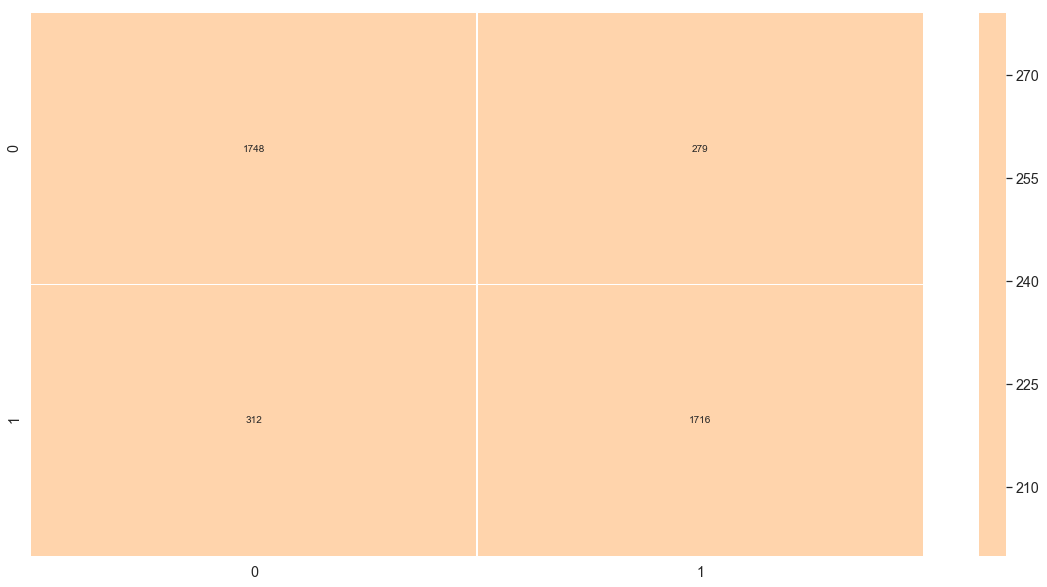

In [148]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(cf, annot=True, fmt="d",linewidths=.5, center = 90, vmax = 200)

In [149]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

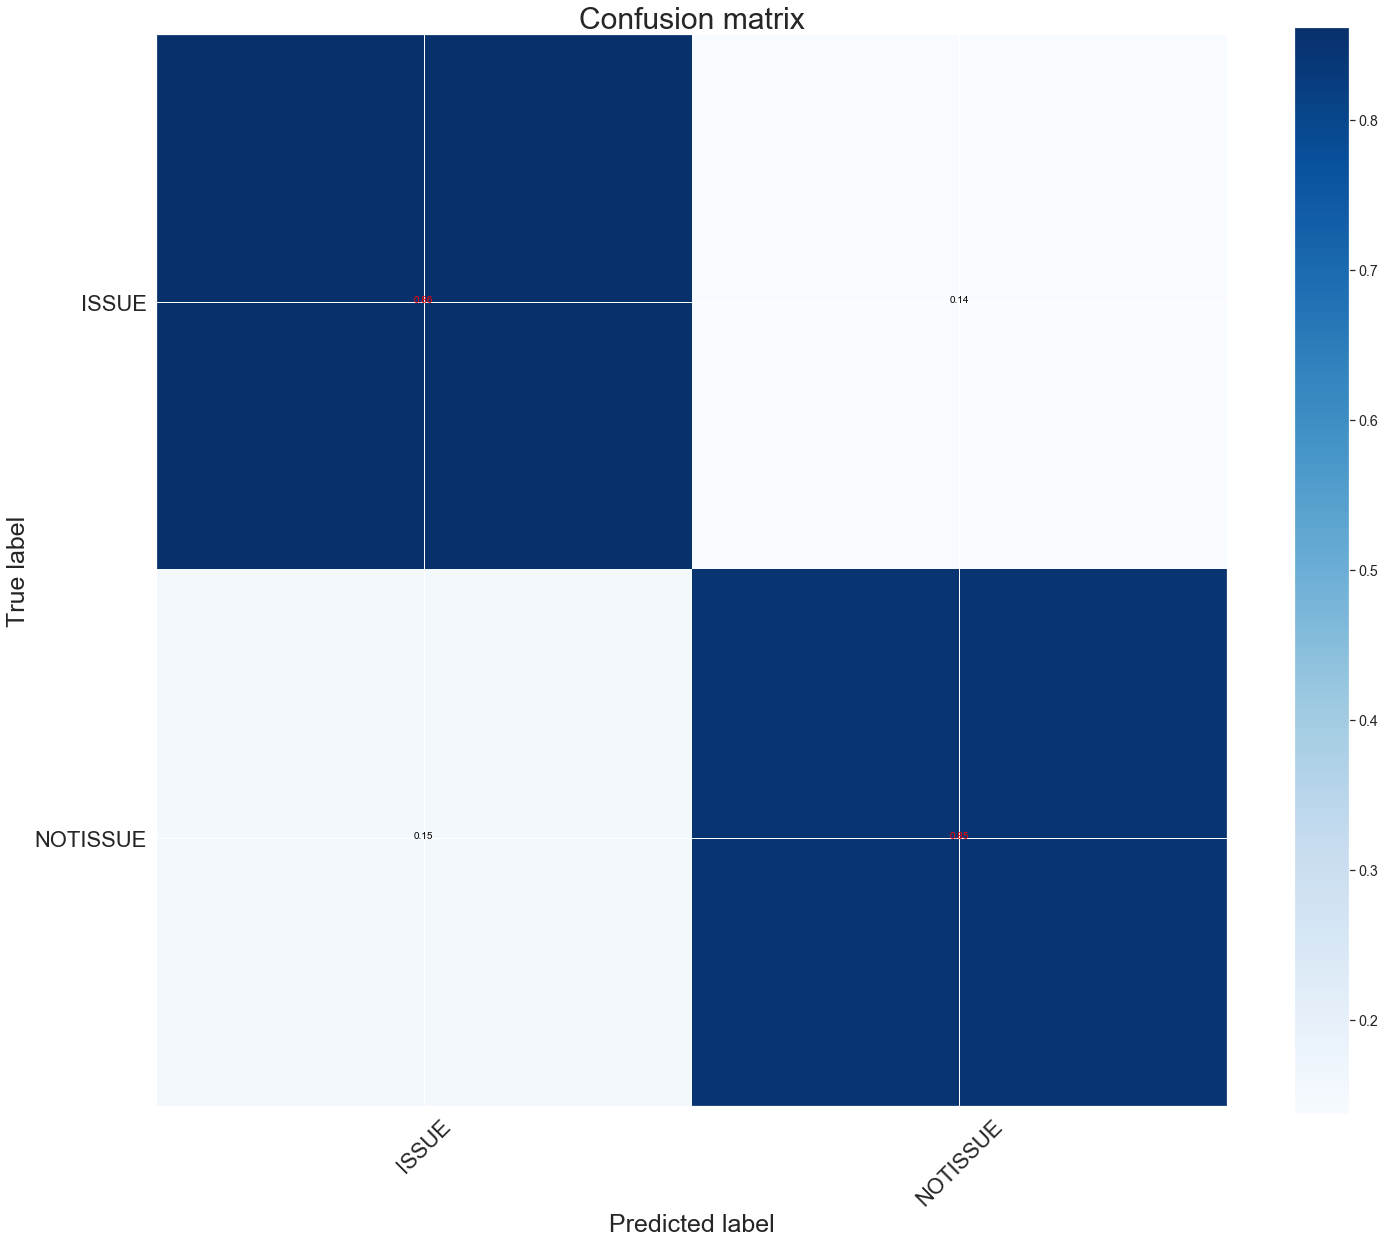

In [150]:
cnf_matrix = confusion_matrix(df.label, data_predict.label)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=['ISSUE','NOTISSUE'], title="Confusion matrix")
plt.show()

In [151]:
from sklearn.metrics import classification_report, accuracy_score

print('accuracy %s' % accuracy_score(data_predict.label, df.label))
print(classification_report(df.label, data_predict.label,target_names=['ISSUE','NOTISSUE']))

accuracy 0.8542540073982737
              precision    recall  f1-score   support

       ISSUE       0.85      0.86      0.86      2027
    NOTISSUE       0.86      0.85      0.85      2028

   micro avg       0.85      0.85      0.85      4055
   macro avg       0.85      0.85      0.85      4055
weighted avg       0.85      0.85      0.85      4055



In [152]:
def false_pos_neg(input_file,output_file,falses_file):
    diff= pd.DataFrame(columns=['true_label','pred_label', 'Text'])
    data = pd.read_csv(input_file,delimiter=',')
    data_pred = pd.read_csv(output_file,delimiter=';')
    t_labels = data.label
    p_labels = data_pred.label
    
    label=data.text.values
    t_label = t_labels.values
    p_label = p_labels.values
    for i in range(len(t_label)):
        if t_label[i]!=p_label[i]:
            diff = diff.append({'true_label':t_label[i],'pred_label':p_label[i], 'Text':label[i]},ignore_index=True)
    diff.to_csv(falses_file,sep=';')
    return diff

In [153]:
falses_file='Data/false_pred_glove300_with_text_preprocessing_brute1.csv'
diff=false_pos_neg(input_file,output_file,falses_file)
print(diff)

    true_label pred_label                                               Text
0     NOTISSUE      ISSUE                                     not be happier
1        ISSUE   NOTISSUE  picture resolution be far comparably price pho...
2        ISSUE   NOTISSUE  be stupid have keep buy new charger car charge...
3     NOTISSUE      ISSUE            be phone have have have be cheaply make
4        ISSUE   NOTISSUE                            plastic break easy clip
5     NOTISSUE      ISSUE                             do not make mistake do
6     NOTISSUE      ISSUE  sanyo have survive dozen drop blackton ill effect
7     NOTISSUE      ISSUE               find cell phone right away enter car
8        ISSUE   NOTISSUE                                        low quality
9     NOTISSUE      ISSUE  do not find it bad again unit come one arpad o...
10    NOTISSUE      ISSUE  have get defect not risk buy again build quali...
11    NOTISSUE      ISSUE                         be nothing bad say headset